<h1 style='color: 	#1f1f7a; font-size: 34px; font-weight: bold;'> Semantix - Desafio Data Science 
<hr style='border: 2px solid 		#1f1f7a;'>


# <font color=#5c5cd6 style='font-size: 30px;'>  Objetivo   </font>
<hr style='border: 2px solid 	#5c5cd6;'>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
Relacionar o perfil de potenciais clientes de um banco </p>    







# <font color=#5c5cd6 style='font-size: 30px;'> Preparação inicial </font>
<hr style='border: 2px solid #5c5cd6;'>


### Importando bibliotecas 

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sb

In [4]:
from scipy import stats

### Importando o conjunto de dados

In [5]:
clientes = pd.read_csv('bank-full.csv', sep = ';')

In [6]:
clientes.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# <font color=#5c5cd6 style='font-size: 30px;'> Questões </font>
<hr style='border: 2px solid #5c5cd6;'>


<hr>
<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
As questões propostas no desafio serão respondidas abaixo. </p>    
<hr>

## <font color = 'purple'> Questão 1:</font>
<hr style = 'border: 1px solid purple;'>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Enunciado:</b> Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?      </p>    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
Os empréstimos estão separados em duas categorias: imobiliário e pessoal. A análise será feita através de um gráfico de barras. Para cada profissão, esse gráfico apresentará a fração de clientes que fizeram empréstimo, independentemente de qual tipo considerado no atual estudo (<i>i.e.,</i> imobiliário e pessoal). 



Dentro de cada profissão, qual a porcentagem de clientes que fazem emprestimo</p>


<hr>

In [7]:
#Obtendo as profissões consideradas no estudo
profissoes = clientes['job'].drop_duplicates()

profissoes = profissoes.tolist()


In [8]:
#Para cada profissão, sera contabilizado a fração de clientes que contraiu um empréstimo 

porcent_emprestimos = []

for cont in profissoes:
    
    #Filtrando clientes para uma dada profissão dentro da lista  profissoes
    clientes_prof  = clientes[clientes['job'] == cont] 
    
    #Determinando dentro de "clientes_prof" aqueles que realizaram no mínimo um empréstimo
    log = (clientes_prof['housing']  == 'yes') | (clientes_prof['loan']  == 'yes')  
    
    #Calculo das porcentagens de clientes por profissão que contrairam no minimo 1 emprestimo
    porcent_emprestimos.append( round(100.0*(clientes_prof[log].shape[0]/clientes_prof.shape[0]),2 ))
   
    

In [9]:
#Construindo um Data Frame com os resultados obtidos

emprestimo_por_profissao = pd.DataFrame({'Profissao': profissoes, 'Emprestimo (%)': porcent_emprestimos}, \
                                        index = range(1, len(profissoes)+1) , \
                                        columns = ['Profissao', 'Emprestimo (%)']).sort_values(by='Emprestimo (%)')

#Mostrando os resultados
emprestimo_por_profissao 

,Profissao,Emprestimo (%)
5,unknown,9.72
12,student,27.40
6,retired,30.87
11,housemaid,39.52
10,unemployed,45.20
9,self-employed,54.72
1,management,55.24
2,technician,60.66
3,entrepreneur,68.33
7,admin.,69.02


### Apresentando os resultados num gráfico de barras

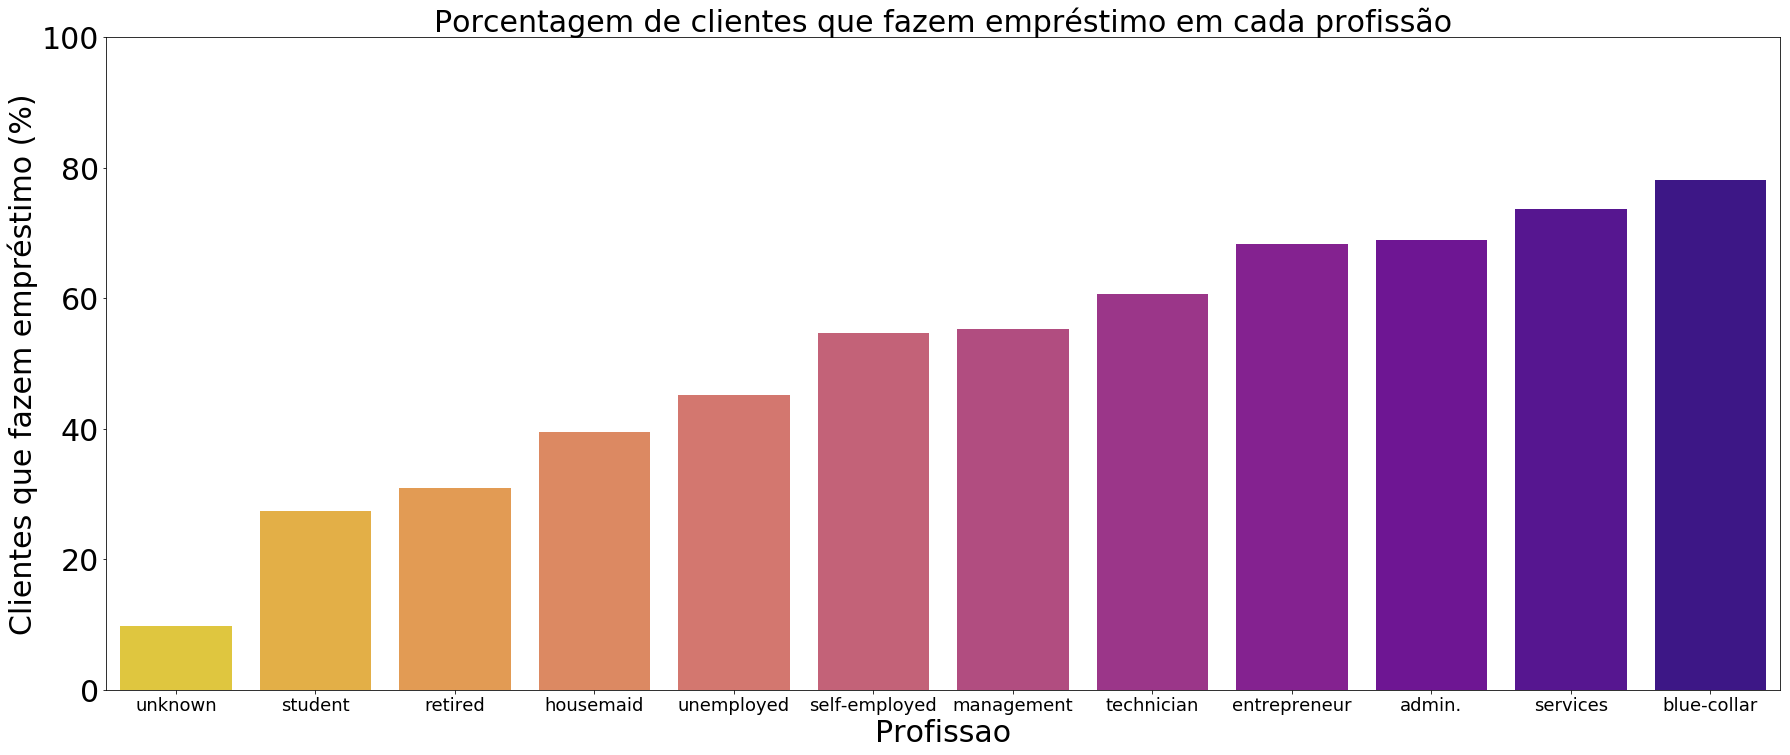

In [10]:
#--Estética do gráfico

plt.figure(figsize=(30,12)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 18) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y

plt.ylim((0,100)) #Definindo limites do eixos y


#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Profissao', y='Emprestimo (%)', data = emprestimo_por_profissao,  palette="plasma_r")


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Profissao',fontsize = 30)
plt.ylabel('Clientes que fazem empréstimo (%)',fontsize = 30)
plt.title('Porcentagem de clientes que fazem empréstimo em cada profissão',fontsize = 30)

#--Definindo o estilo do gráfico

sb.set_style("darkgrid")


<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Comentário:</b> A profissão <i>"blue-collar"</i> apresenta a maior tendância de se realizar um empréstimo. Agora, é necessário checar para a profissão <i>"blue-collar"</i> qual o tipo de empréstimo é mais realizado.</p>


<hr>

### Determinando o tipo de empréstimo preferido

In [11]:
#--Coletando dados para a profissão "blue-collar"
clientes_bluecollar = clientes[clientes['job'] == 'blue-collar']

<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
    <b>Comentário:</b> Os clientes cuja a profissão é <i>"Blue-collar"</i> serão dividios em 3 categorias:</p>

<ul>
 
<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Housing:</b> Clientes que contraíram apenas empréstimo imobiliários; </li>
   
<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Loan:</b> Clientes que contraíram apenas empréstimo pessoal; </li> 

<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Ambos:</b> Clientes que contraíram empréstimos imobiliário e pessoal; </li>   

<li> <p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'><b>Nenhum:</b> Clientes que não contraíram empréstimos. </li>   
    
    
    
    
    
</Ul>    



<hr>

In [12]:
#--Definindo lista que conterá os nomes das categorias 
nome_categorias = ['Housing', 'Loan', 'Ambos', 'Nenhum']

#--Definindo lista que coletará as porcentagens de clientes em cada uma das categorias
porcent_categorias = []

In [13]:
#--Porcentagem de clientes nas 4 categorias

for cont in nome_categorias:
    
    
    if cont != 'Nenhum':
        
        if cont == 'Housing':
            
            #Operação lógica dentro "clientes_bluecollar" para clientes da catergoria Housing
            log = (clientes_bluecollar['housing']  == 'yes') & (clientes_bluecollar['loan']  == 'no') 
            
            
        elif cont == 'Loan':
            
            #Operação lógica dentro "clientes_bluecollar" para clientes da catergoria Loan
            log = (clientes_bluecollar['housing']  == 'no') & (clientes_bluecollar['loan']  == 'yes') 
            
        else:
            
            #Operação lógica dentro "clientes_bluecollar" para clientes da catergorua Ambos
            log = (clientes_bluecollar['housing']  == 'yes') & (clientes_bluecollar['loan']  == 'yes')

            
            
        #Obtendo clientes para uma dada categoria 
        clientes_BC_categoria = clientes_bluecollar[log]
        
        #Quardando a fração de clientes dentro de uma categoria 
        porcent_categorias.append( round(100.0*clientes_BC_categoria.shape[0]/clientes_bluecollar.shape[0],2))

        
    else:    
        
        #--Porcentagem de clientes na categoria "Nenhum"
        porcent_categorias.append(100.0 - sum(porcent_categorias))


In [14]:
#--Construindo um Data Frame com os resultados obtidos

emprestimos_bluecollar = pd.DataFrame(data = {'Categoria':nome_categorias, '(%)':porcent_categorias}, \
                                    columns = ['Categoria', '(%)']).sort_values(by='(%)')

#Mostrando o resultado
emprestimos_bluecollar

,Categoria,(%)
1,Loan,5.66
2,Ambos,11.64
3,Nenhum,21.92
0,Housing,60.78


### Apresentando os resultados num gráfico de barras

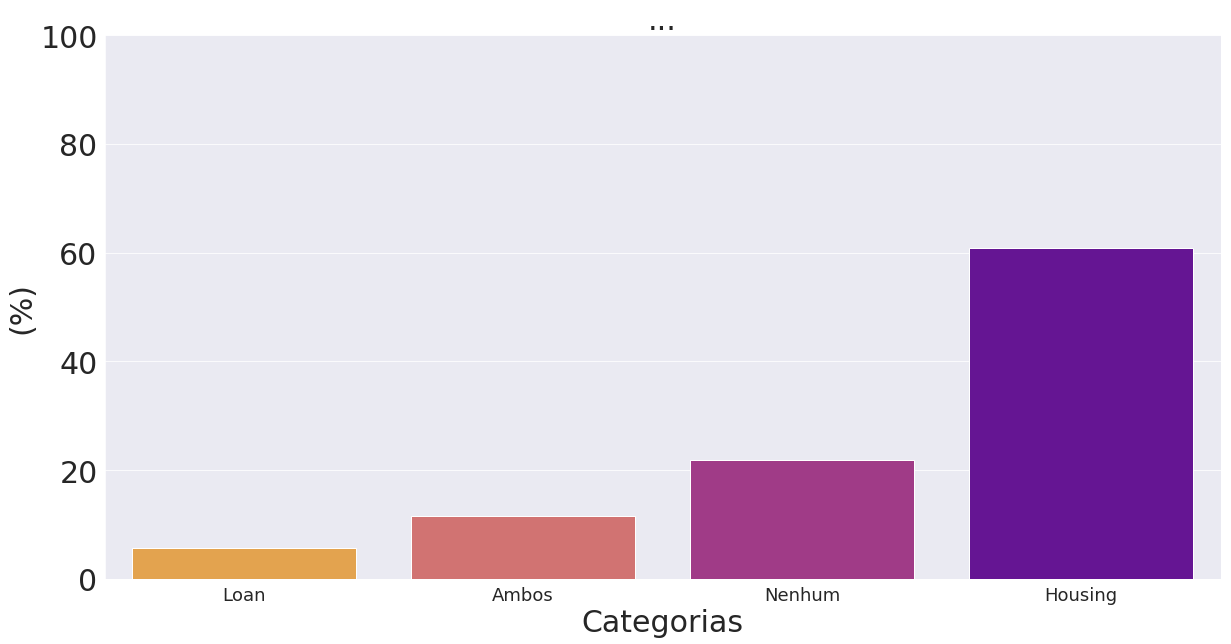

In [15]:
#--Estética do gráfico

plt.figure(figsize=(20,10)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 18) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y

plt.ylim((0,100)) #Definindo limites do eixos y


#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Categoria', y='(%)', data = emprestimos_bluecollar,  palette="plasma_r")


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Categorias',fontsize = 30)
plt.ylabel('(%)',fontsize = 30)
plt.title('...',fontsize = 30)

#--Definindo o estilo do gráfico

sb.set_style("darkgrid")

<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Resposta questão 1:</b> ...</p>


<hr>

## <font color = 'purple'> Questão 2:</font>
<hr style = 'border: 1px solid purple;'>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Enunciado:</b> Fazendo uma relação entre número de contatos e sucesso da campanha quais
são os pontos relevantes a serem observados?</p>  

<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
A relação estabelecida será construída a partir de um gráfico. </p>

<hr>

In [16]:
#--Construindo uma lista com todas as quantidades de contados observados ao longo deste estudo 
quant_contatos = sorted(clientes['campaign'].drop_duplicates().tolist())

In [17]:
#--Computar o número de sucessos e a porcentagem em relação aos sucessos totais
#--para cada uma das quantidades de contatos observados

quant_sucessos   =  []  #Lista que guardará a QTD sucessos

porc_tot_sucessos = []  #Lista que guardará a porcentagem em rela. sucessos totais

for cont in quant_contatos:
    
    #Operador logico para filtrar os dados 
    log  = (clientes['campaign'] == cont) & (clientes['y'] == 'yes')
    
    #Povoando lita de QTD de sucessos 
    quant_sucessos.append(clientes[log].shape[0])
    
    #Povoando lista % em relação ao total de sucesso
    porc_tot_sucessos.append(round(100.0*clientes[log].shape[0]/clientes[ clientes['y'] =='yes'].shape[0],2))
    

In [18]:
#--Construindo dados de probabilidade acumulada

prob_acumulada = [] #Lista que guardará a probabilidade acumulada

#Inserindo o primeiro elemento
prob_acumulada.append(porc_tot_sucessos[0])


for cont in porc_tot_sucessos[1:]:
    
    prob_acumulada.append(cont + prob_acumulada[-1])

   

In [19]:
#--Construir um Dataframe com os resultados

sucesso_contatos = pd.DataFrame(data = {'Num. Contatos': quant_contatos, 'Num. Sucessos':quant_sucessos,\
                                        '% dos sucessos': porc_tot_sucessos, '% Acumulada': prob_acumulada}, \
                                         columns= ['Num. Contatos', 'Num. Sucessos','% dos sucessos', '% Acumulada'])


#Mostrando o resultado
sucesso_contatos.head(n = 15)


,Num. Contatos,Num. Sucessos,% dos sucessos,% Acumulada
0,1,2561,48.42,48.42
1,2,1401,26.49,74.91
2,3,618,11.68,86.59
3,4,317,5.99,92.58
4,5,139,2.63,95.21
5,6,92,1.74,96.95
6,7,47,0.89,97.84
7,8,32,0.61,98.45
8,9,21,0.40,98.85
9,10,14,0.26,99.11


### Gráfico com o número de sucesso por quatidade de chamada

Text(0.5,1,'Sucesso por chamadas na campanha')

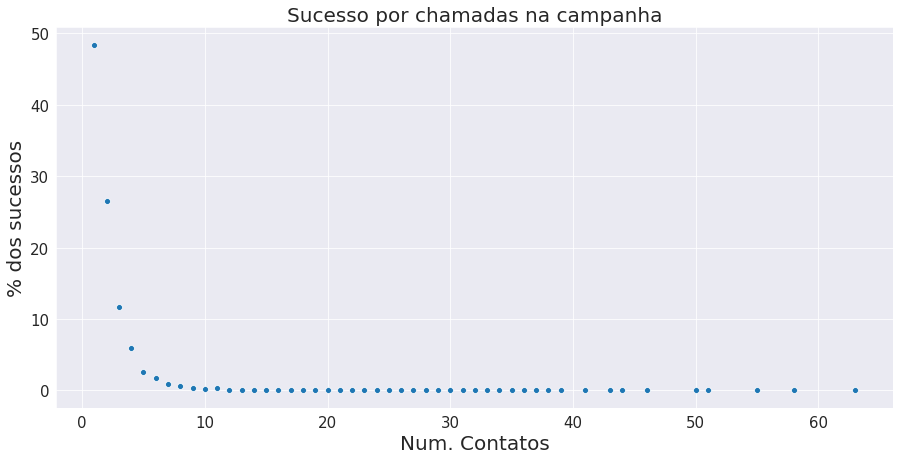

In [20]:
#--Aparência do gráfico

plt.figure(figsize=(15,7)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 15) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 15) #Tamanho dos números do eixo y

#Construindo um scatter plot

sb.scatterplot(x = 'Num. Contatos', y = '% dos sucessos', data = sucesso_contatos)

#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Num. Contatos',fontsize = 20)
plt.ylabel('% dos sucessos',fontsize = 20)
plt.title('Sucesso por chamadas na campanha',fontsize = 20)

### Grafico com probabilidade acumulada e probabilidade pontual

Text(0.5,1,'...')

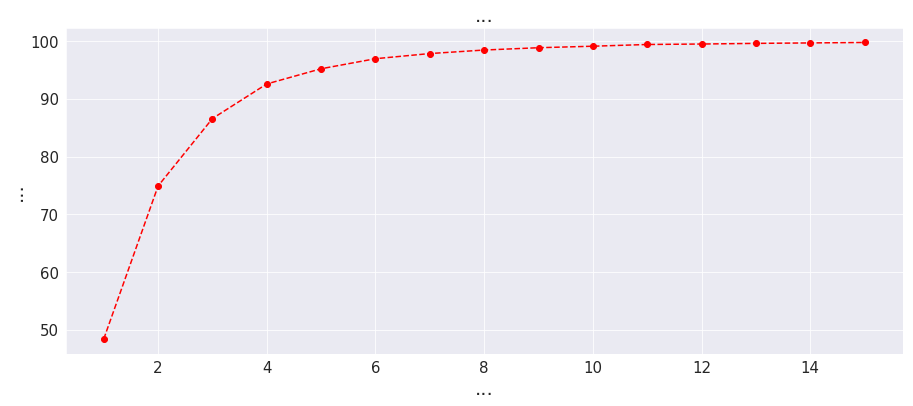

In [21]:
#--Aparência do gráfico

plt.figure(figsize=(15,6)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 15) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 15) #Tamanho dos números do eixo y


#Construindo um scatter plot

plt.plot(sucesso_contatos['Num. Contatos'].iloc[0:15] ,sucesso_contatos['% Acumulada'].iloc[0:15],'ro--')



#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('...',fontsize = 20)
plt.ylabel('...',fontsize = 20)
plt.title('...',fontsize = 20)



### Explorando taxa de conversão por grupo de contatos realizados

In [22]:
#Criando lista com sucessos relativos
suce_relativo = []

#Criando lista com número de clientes em cada grupo de QTD de contatos
clientes_por_contato = []

for cont in quant_contatos:
    
    #Operador logico para filtrar os dados 
    log  = (clientes['campaign'] == cont) & (clientes['y'] == 'yes')
    
    #Populando lista com sucessos relativos 
    suce_relativo.append(round(100.0*clientes[log].shape[0]/clientes[ clientes['campaign'] == cont].shape[0],2))

    #Populando lista com número de clientes em cada grupo de QTD de contatos
    clientes_por_contato.append(clientes[ clientes['campaign'] == cont].shape[0])
    
    

In [23]:
#--Construir um Dataframe com os resultados

taxa_conversao = pd.DataFrame(data = {'Num_Contatos':quant_contatos, 'Num_Clientes': clientes_por_contato,\
                              'Taxa_Conversao': suce_relativo}, columns= ['Num_Contatos', 'Num_Clientes','Taxa_Conversao'])


#Mostrando resultados 
taxa_conversao.head(n = 15)

,Num_Contatos,Num_Clientes,Taxa_Conversao
0,1,17544,14.60
1,2,12505,11.20
2,3,5521,11.19
3,4,3522,9.00
4,5,1764,7.88
5,6,1291,7.13
6,7,735,6.39
7,8,540,5.93
8,9,327,6.42
9,10,266,5.26


### Apresentando graficamente os sucessos relativos 

Text(0.5,1,'Taxa de conversão por quantidade de contato')

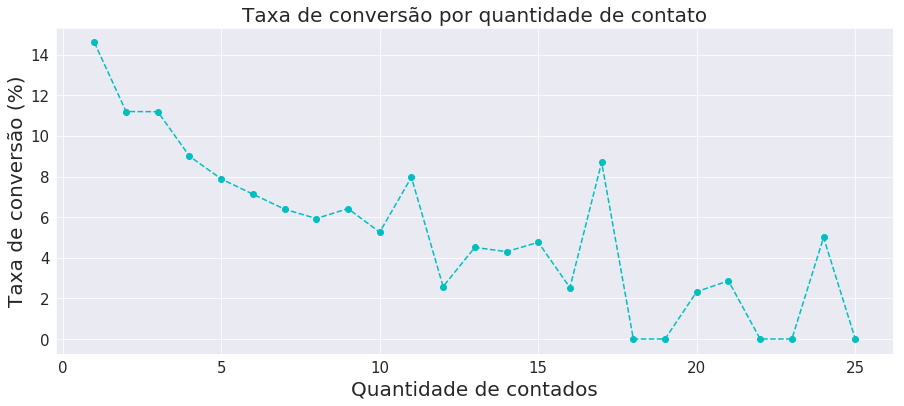

In [24]:
#--Aparência do gráfico

plt.figure(figsize=(15,6)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 15) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 15) #Tamanho dos números do eixo y


#--Construindo um scatter plot

#Operados lógico
log = taxa_conversao['Num_Clientes']   >= 20

plt.plot( taxa_conversao[log].Num_Contatos, taxa_conversao[log].Taxa_Conversao, 'co--')



#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Quantidade de contados',fontsize = 20)
plt.ylabel('Taxa de conversão (%)',fontsize = 20)
plt.title('Taxa de conversão por quantidade de contato',fontsize = 20)


<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Resposta questão 2:</b> ...</p>


<hr>

## <font color = 'purple'> Questão 3:</font>
<hr style = 'border: 1px solid purple;'>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Enunciado:</b> Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão? </p>  



<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
O número médio de ligações que irei propor será contabilizado pela média ponderada de cada quantidade de ligação. O fator de ponderação será porcentágem total de sucessos para cada uma das quantidades de ligação realizadas.Para isso teremos:</p>

<hr>

In [25]:
#---Cáculo da média de ligações

media_ligacoes = round(sum(((sucesso_contatos['Num. Contatos']*(sucesso_contatos['% dos sucessos']/100.0))).tolist()))


print('Media de ligacoes será de {} chamadas'.format(media_ligacoes))


Media de ligacoes será de 2 chamadas


<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
...</p>

<hr>

## <font color = 'purple'> Questão 6:</font>
<hr style = 'border: 1px solid purple;'>

<p style='font-size: 20px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<b>Enunciado:</b> Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário? </p>  




<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
...</p>

<hr>

### Filtrando os clientes que possuam empréstimo imobiliário

In [26]:
clientes_imobiliario = clientes[clientes['housing'] == 'yes']

### Distribuição de idade dos clientes que contraíram um empréstimo imobiliário 

<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
A distribuição de idades será avaliada através de um histograma</p>

<hr>

Text(0.5,1,'...')

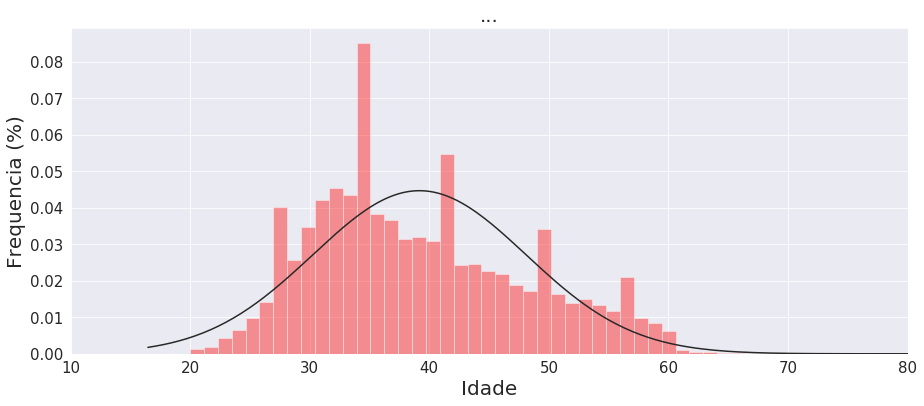

In [27]:
#--Aparência do gráfico

plt.figure(figsize=(15,6)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 15) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 15) #Tamanho dos números do eixo y

plt.xlim((10,80))  #Defindo limites do eixo x

#--Plotando o histograma
sb.distplot(clientes_imobiliario['age'],   kde=False, fit=stats.norm, color= 'red' )


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Idade',fontsize = 20)
plt.ylabel('Frequencia (%)',fontsize = 20)
plt.title('...',fontsize = 20)

<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
No histograma acima, foi ajustada uma distribuição normal sobre os dados.</p>

<hr>

In [28]:
#--Obtendo parâmetros da distribuição normal
normal_fit = stats.norm.fit(clientes_imobiliario['age'])


print('A distribuição de idade possui média de {} anos e desvio padrão de {} anos'.format(round(normal_fit[0],1) \
                                                                                  ,round(normal_fit[1],1)  ))


A distribuição de idade possui média de 39.2 anos e desvio padrão de 8.9 anos


### Perfil profissional dos clientes que possuem empréstimo imobiliário

<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
É necessário obter a porcentagem por profissão dos cliente que fizeram empréstimo imobiliário.</p>

<hr>

In [29]:
#--Obtendo as profissões dos clientes que possuem empréstimo imobiliário  

profissoes_imobiliario = clientes_imobiliario['job'].drop_duplicates()

In [30]:
#--Do total de empréstimos imobiliários obter o porcentagem referente a cada profissão

proc_I_profi = []

for cont in profissoes_imobiliario:
    
    #Calculando a fração referente a cada profissão 
    temp = (100.0*clientes_imobiliario[clientes_imobiliario['job'] == cont].shape[0])/clientes_imobiliario.shape[0]
        
    
    proc_I_profi.append(temp)


In [31]:
#--Contruindo um dataframe para organizar os resultados

prof_clientes = pd.DataFrame({'Profissao': profissoes_imobiliario, '%_clientes': proc_I_profi },\
                          columns = ['Profissao','%_clientes']  ).sort_values(by='%_clientes')


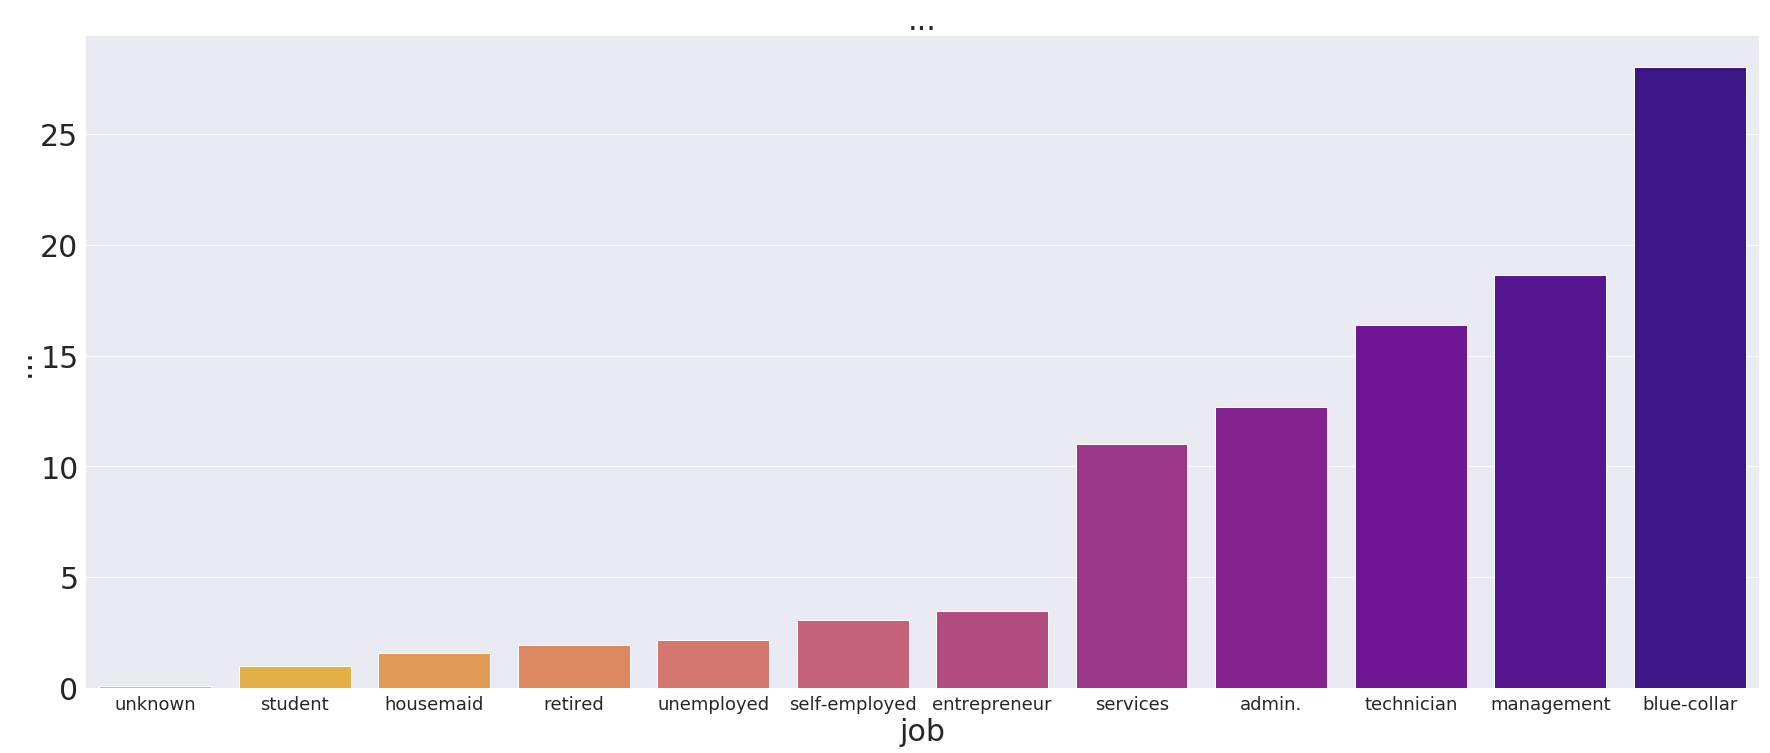

In [32]:
#--Apresentado os resultados num gráfico de barras

#-Estética do gráfico

plt.figure(figsize=(30,12)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 18) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y

#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Profissao', y='%_clientes', data = prof_clientes,  palette="plasma_r")


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('job',fontsize = 30)
plt.ylabel('...',fontsize = 30)
plt.title('...',fontsize = 30)

#--Definindo o estilo do gráfico

sb.set_style("darkgrid")

### Estado civil dos clientes com empréstimo imobiliário

<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
...</p>

<hr>

In [33]:
#--Obtendo o estado civil dos clientes
marital = clientes_imobiliario['marital'].drop_duplicates()

In [34]:
#--Obter a porcentagem dos clientes em cada um dos estados civis
porc_tipo_marital = [] 


for cont in marital:
    
    #Computando a fração
    temp = (100.0*clientes_imobiliario[clientes_imobiliario['marital'] == cont].shape[0])/clientes_imobiliario.shape[0]
    
    
    porc_tipo_marital.append(round(temp,2))


In [35]:
#--Construindo um Data frame para organizar os dados

dados_marital = pd.DataFrame(data = {'Est. civil': marital, '% Clientes': porc_tipo_marital},\
                            columns= ['Est. civil', '% Clientes']).sort_values(by='% Clientes')

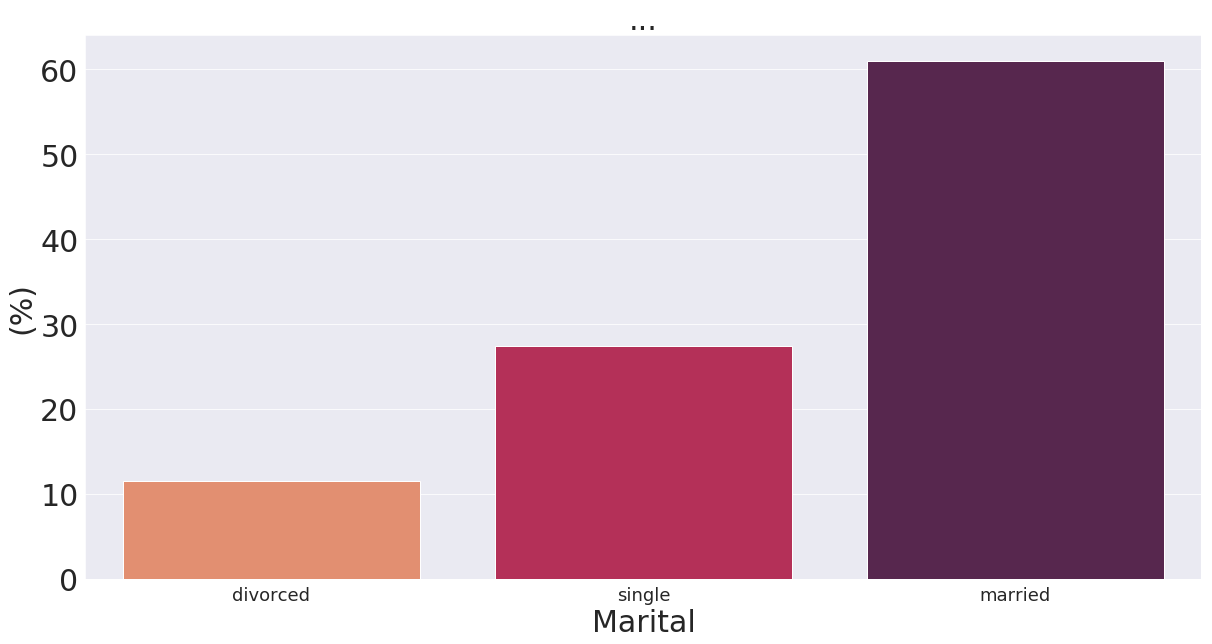

In [36]:
#--Estética do gráfico

plt.figure(figsize=(20,10)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 18) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y

#plt.ylim((0,100)) #Definindo limites do eixos y


#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Est. civil', y='% Clientes', data = dados_marital,  palette="rocket_r")


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Marital',fontsize = 30)
plt.ylabel('(%)',fontsize = 30)
plt.title('...',fontsize = 30)

#--Definindo o estilo do gráfico

sb.set_style("darkgrid")

### Escolaridade dos clientes que fizeram um empréstimo imobiliário

<hr>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
...</p>

<hr>

In [37]:
#--Obtendo a escolaridade dos clientes com empréstimo imobiliário
escolaridade = clientes_imobiliario['education'].drop_duplicates()

In [38]:
#--Obter a porcentagem dos clientes em cada um dos estados civis
porc_tipo_escolaridade = []


for cont in escolaridade:
    
    #Obtendo porcentagem dos clientes para cada modalidade de escolaridade
    temp = 100.0*clientes_imobiliario[clientes_imobiliario['education'] == cont].shape[0]/clientes_imobiliario.shape[0]
    
    porc_tipo_escolaridade.append( round(temp,2))
        

In [39]:
#--Construindo um data frame para organizar os dados
dados_escolaridade = pd.DataFrame(data = {'Escolaridade': escolaridade, '% Clientes': porc_tipo_escolaridade},\
                                  columns=['Escolaridade', '% Clientes']).sort_values(by='% Clientes')


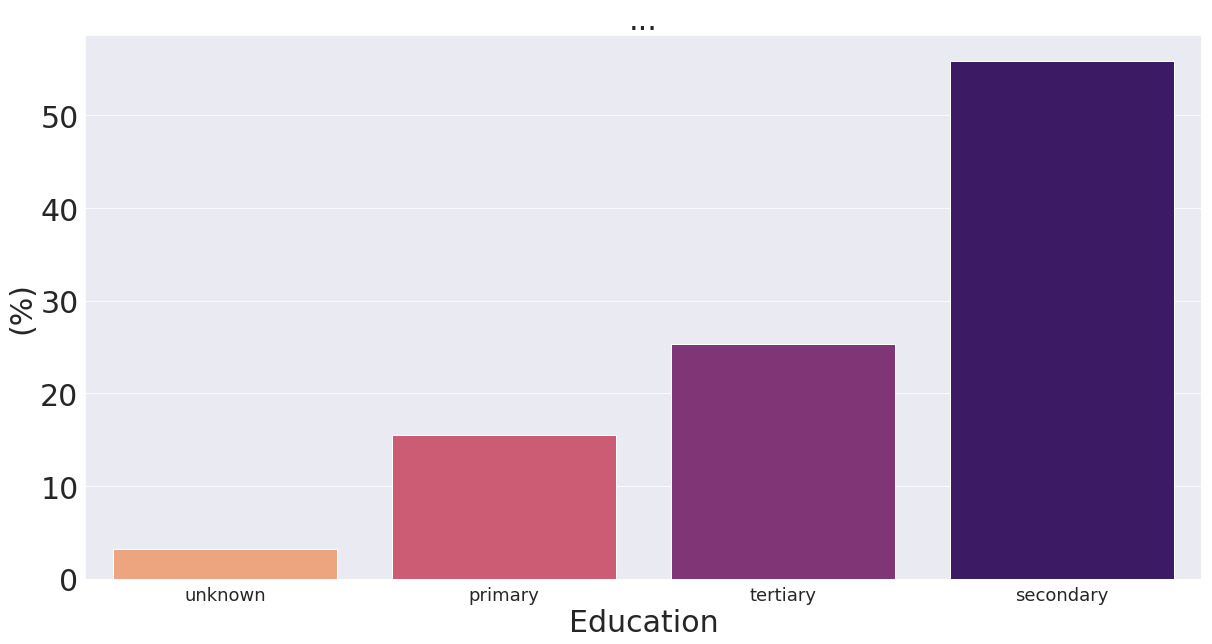

In [40]:
#--Estética do gráfico

plt.figure(figsize=(20,10)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 18) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 30) #Tamanho dos números do eixo y

#plt.ylim((0,100)) #Definindo limites do eixos y


#--Construindo o gráfico de barras
graf_barras = sb.barplot(x='Escolaridade', y='% Clientes', data = dados_escolaridade ,  palette="magma_r")


#--Modificando legenda dos eixos e inserindo título no gráfico
plt.xlabel('Education',fontsize = 30)
plt.ylabel('(%)',fontsize = 30)
plt.title('...',fontsize = 30)

#--Definindo o estilo do gráfico

sb.set_style("darkgrid")

### A presença de seguro de crédito 

In [41]:
#--Obtendo a lista com a condição do crédito pré-aprovado
seguro  = clientes_imobiliario['default'].drop_duplicates()


In [42]:
#--obter a porcentagem de clientes em cada uma das condições de crédito pré-aprovado
porc_mod_seguro = []


for cont in seguro:
    
    #--Obter porcentagem das modalidades de crédito pré-aprovado
    temp = 100.0*clientes_imobiliario[clientes_imobiliario['default'] == cont].shape[0]/clientes_imobiliario.shape[0]

    porc_mod_seguro.append(round(temp,2))


In [59]:
#--Construindo data frame para organizar os resultados

dados_credito = pd.DataFrame(data = { 'Necessidade de seguro':['não', 'sim'], '% Clientes': porc_mod_seguro},\
                            columns= ['Necessidade de seguro', '% Clientes'])

In [60]:
dados_credito

,Necessidade de seguro,% Clientes
0,não,98.27
1,sim,1.73


###  Saldo médio anual dos clientes com empréstimo imobiliário

In [86]:
clientes_imobiliario.shape[0] 

25130

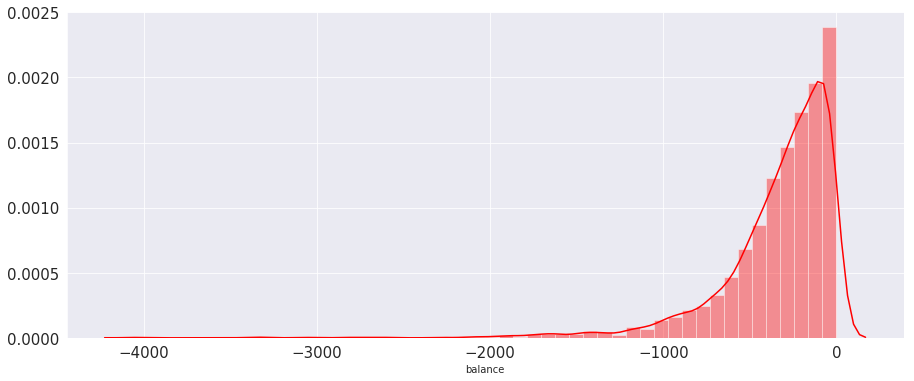

In [82]:
#--Aparência do gráfico

plt.figure(figsize=(15,6)) #Tamanho do gráfico 

plt.tick_params(axis = 'x', labelsize = 15) #Tamanho dos números do eixo y

plt.tick_params(axis = 'y', labelsize = 15) #Tamanho dos números do eixo y


sb.distplot(clientes_imobiliario[clientes_imobiliario['balance'] < 0].balance, color = 'red'                              )